In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
s = df.isna().sum()
s

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
s[s>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [10]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
cat

['Sex', 'Embarked']

In [12]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [15]:
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [16]:
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,random_state=21,test_size=0.33)

In [20]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
553,0.827377,-0.592481,-0.474545,-0.473674,-0.502949,0.0,1.0,1.0,0.0,0.0
717,-0.369365,-0.207709,-0.474545,-0.473674,-0.437007,1.0,0.0,0.0,0.0,1.0
432,-0.369365,0.946606,0.432793,-0.473674,-0.124920,1.0,0.0,0.0,0.0,1.0
168,-1.566107,0.000000,-0.474545,-0.473674,-0.126430,0.0,1.0,0.0,0.0,1.0
481,-0.369365,0.000000,-0.474545,-0.473674,-0.648422,0.0,1.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Survived
553,1
717,1
432,1
168,0
481,0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.284663,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.823344,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.746389,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,0.000000,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.484880,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [23]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [24]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
model1.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [25]:
model1.score(xtrain,ytrain)

0.7919463087248322

In [26]:
model1.score(xtest,ytest)

0.7762711864406779

In [27]:
params = {'n_estimators':[10,50,100,200,300,400,500],
          'max_depth':[1,2,3,4,5,6,7,8],
          'min_samples_split':[2,3,4,5,6,7,8],
          'criterion':['gini','entropy']}

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rfcv1 = RandomizedSearchCV(rfc,param_distributions=params,cv=5,scoring='f1_macro')
rfcv1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400, 500]},
                   scoring='f1_macro')

In [29]:
rfcv1.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 5,
 'criterion': 'entropy'}

In [30]:
rfcv1.best_score_

0.8118198634807376

In [31]:
best_rfc = rfcv1.best_estimator_

In [32]:
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=200)

In [33]:
best_rfc.score(xtrain,ytrain)

0.8657718120805369

In [34]:
best_rfc.score(xtest,ytest)

0.8101694915254237

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)

In [36]:
model2.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [37]:
model2.score(xtrain,ytrain)

0.7919463087248322

In [38]:
model2.score(xtest,ytest)

0.7762711864406779

In [39]:
params2 = {'learning_rate':[0.01,0.1,0.15,0.2],
           'n_estimators':[10,50,100,200,300,400,500],
           'max_depth':[1,2,3,4,5,6,7],
           'min_samples_split':[2,3,4,5,6,7]}

In [40]:
gbc = GradientBoostingClassifier()
rfcv2 = RandomizedSearchCV(gbc,param_distributions=params2,cv=5,scoring='f1_macro')
rfcv2.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         400, 500]},
                   scoring='f1_macro')

In [41]:
rfcv2.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'max_depth': 2,
 'learning_rate': 0.1}

In [42]:
rfcv2.best_score_

0.8194767707764363

In [43]:
best_gbc = rfcv2.best_estimator_

In [44]:
best_gbc

GradientBoostingClassifier(max_depth=2, min_samples_split=7)

In [45]:
best_gbc.score(xtrain,ytrain)

0.8741610738255033

In [46]:
best_gbc.score(xtest,ytest)

0.8

In [47]:
ypred_train = best_gbc.predict(xtrain)
ypred_test = best_gbc.predict(xtest)

In [48]:
ypred_train[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [49]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

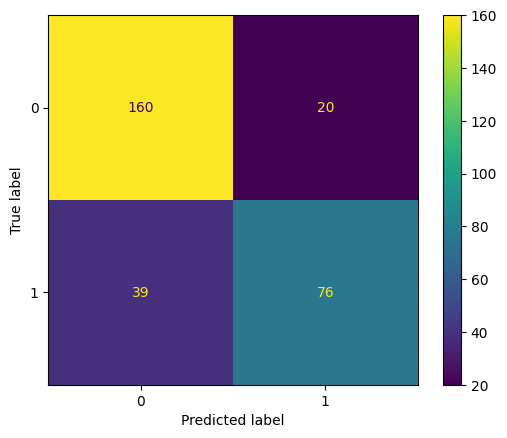

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_gbc,xtest,ytest)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       180
           1       0.79      0.66      0.72       115

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.80       295



In [52]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
xnew_pre = pre.transform(xnew)

In [54]:
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.369449,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.331378,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.485693,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.207709,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.592481,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [55]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [57]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.8645171 , 0.1354829 ],
       [0.41470947, 0.58529053],
       [0.91702926, 0.08297074],
       [0.88187755, 0.11812245],
       [0.52600859, 0.47399141]])

In [59]:
proba_sur = probs[:, 1]
proba_sur[0:5]

array([0.1354829 , 0.58529053, 0.08297074, 0.11812245, 0.47399141])

In [60]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [62]:
df_final['Survived_pred'] = preds 
df_final['Probability_sur'] = proba_sur 

In [63]:
df_final

,PassengerId,Survived_pred,Probability_sur
0,892,0,0.135483
1,893,1,0.585291
2,894,0,0.082971
3,895,0,0.118122
4,896,0,0.473991
...,...,...,...
413,1305,0,0.120942
414,1306,1,0.942909
415,1307,0,0.141494
416,1308,0,0.120942


In [64]:
df_final.to_csv('GBCResults.csv', index=False)

In [65]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    282
1    136
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

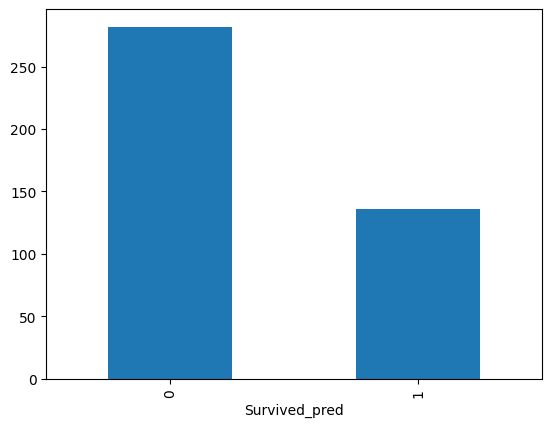

In [66]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

In [67]:
imp = best_gbc.feature_importances_

In [68]:
imp

array([1.48761756e-01, 1.57634932e-01, 3.60216077e-02, 2.06813862e-02,
       6.67524641e-02, 2.78878254e-01, 2.76110591e-01, 1.91544570e-04,
       6.97083855e-04, 1.42703808e-02])

In [69]:
sum(imp)

1.0

In [70]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [71]:
imp_ser = pd.Series(imp)
imp_ser.index = xtrain.columns
imp_ser

num__Pclass        0.148762
num__Age           0.157635
num__SibSp         0.036022
num__Parch         0.020681
num__Fare          0.066752
cat__Sex_female    0.278878
cat__Sex_male      0.276111
cat__Embarked_C    0.000192
cat__Embarked_Q    0.000697
cat__Embarked_S    0.014270
dtype: float64

In [72]:
imp_ser.sort_values(ascending=False)

cat__Sex_female    0.278878
cat__Sex_male      0.276111
num__Age           0.157635
num__Pclass        0.148762
num__Fare          0.066752
num__SibSp         0.036022
num__Parch         0.020681
cat__Embarked_S    0.014270
cat__Embarked_Q    0.000697
cat__Embarked_C    0.000192
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

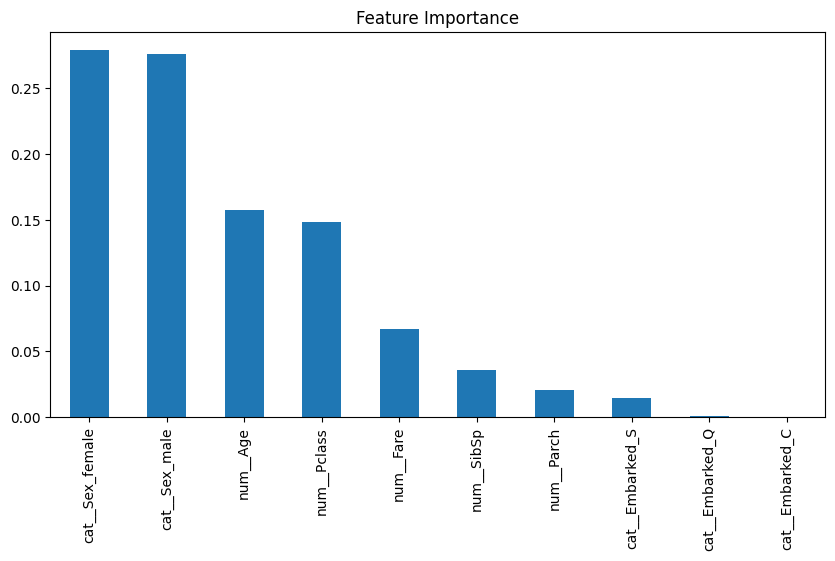

In [73]:
imp_ser.sort_values(ascending=False).plot(kind='bar', 
                                          figsize=(10, 5),
                                          title='Feature Importance')